<a href="https://colab.research.google.com/github/TheDenk/augmixations/blob/feature%2Fno_blots/examples/cutmix_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install augmixations

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from augmixations import Cutmix

##Help functions

In [3]:
def show_img(image, figsize=(4, 6), title=None):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img)
    plt.axis(False)
    plt.show()

def create_img_with_rect(img_h=500, img_w=500, x1=200, y1=200, x2=300, y2=300, color=(80, 80, 80)):
    label = 'rectangle'
    img = np.ones((img_h, img_w, 3), dtype=np.uint8)*230
    img = cv2.rectangle(img, (x1, y1), (x2, y2), color, -1)
    return img, np.array([np.array([x1, y1, x2, y2])]), np.array([label])

def create_img_with_circle(img_h=500, img_w=500, xc=250, yc=250,r=100, color=(150, 150, 150)):
    label = 'circle'
    img = np.ones((img_h, img_w, 3), dtype=np.uint8)*255
    img = cv2.circle(img, (xc, yc), r, color, -1)
    return img, np.array([np.array([xc -  r, xc - r, xc + r, xc + r])]), np.array([label])

def draw_boxes(new_img, boxes, labels):
    frame = new_img.copy()
    
    for (x1, y1, x2, y2), label in zip(boxes, labels): 
        thickness = 2
        font_scale = 1
    
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
        frame = cv2.putText(frame, label, (int(x1), int(y1 - 15)), cv2.FONT_HERSHEY_SIMPLEX ,  
                                   font_scale, (0, 0, 255), thickness, cv2.LINE_AA) 
        
    return frame

##Create images

In [4]:
bg_img, bg_boxes, bg_labels = create_img_with_rect()
fg_img, fg_boxes, fg_labels = create_img_with_circle()

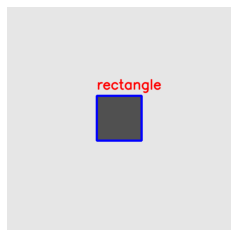

In [5]:
bg_marked = draw_boxes(bg_img, bg_boxes, bg_labels)
show_img(bg_marked)

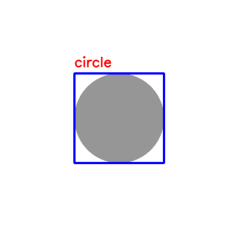

In [6]:
fg_marked = draw_boxes(fg_img, fg_boxes, fg_labels)
show_img(fg_marked)

##Simple usage

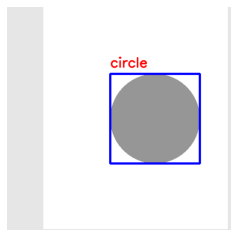

In [7]:
cutmix = Cutmix()
new_img, new_boxes, new_labels = cutmix(
                            bg_img, 
                            bg_boxes,
                            bg_labels,
                            
                            fg_img, 
                            fg_boxes,
                            fg_labels,
                           )

img_with_rect = draw_boxes(new_img, new_boxes, new_labels)
show_img(img_with_rect)

##Advanced usage (with configs)

In [8]:
crop_rect_config = {
    'crop_x' : 100,
    'crop_y' : 100,
    'rect_h' : 200, 
    'rect_w' : 200,  
    'insert_x' : None,
    'insert_y' : None,
}

process_box_config = {
    'max_overlap_area_ratio': 0.75,
    'min_height_result_ratio': 0.25,
    'min_width_result_ratio': 0.25,
    'max_height_intersection': 0.9,
    'max_width_intersection': 0.9,
}

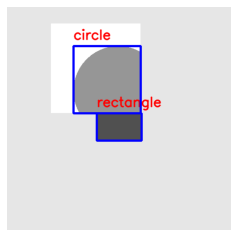

In [9]:
cutmix = Cutmix(crop_rect_config, process_box_config)
new_img, new_boxes, new_labels = cutmix(
                            bg_img, 
                            bg_boxes,
                            bg_labels,
                            
                            fg_img, 
                            fg_boxes,
                            fg_labels,
                           )

img_with_rect = draw_boxes(new_img, new_boxes, new_labels)
show_img(img_with_rect)